# 毕业设计：基于标题检索和语料库分析的《明镜》周刊（1947-2020）涉华报道研究 —— 数据预处理和可视化

## 导入所有需要用到的模块

In [2]:
from wordcloud import WordCloud
from spacy.lang.de.stop_words import STOP_WORDS
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import spacy
import json
import pymongo

## 导入数据

In [3]:
client = pymongo.MongoClient()
db = client['spiegel']
data = db['data']

In [4]:
f = pd.DataFrame(list(data.find()))

In [23]:
f.to_excel('final_nlp.xlsx')

In [5]:
f.head()

Channel   Epaperkey Erscheinungsdatum      Score Seite  \
0  Titelgeschichte Ausland  SP-1950-52        25.12.1950   4.334617    15   
1               Wirtschaft  SP-1950-30        27.07.1950   4.285549    25   
2              Deutschland  SP-1950-30        27.07.1950  1.8850946     7   
3                  Ausland  SP-1950-30        27.07.1950  3.8426323    15   
4          Titelgeschichte  SP-1950-30        27.07.1950  1.1495895    30   

                                                Text  \
0  Abend für Abend wird der General Douglas MacAr...   
1  Die Reisenden des D-Zuges Wien-München setzten...   
2  Fünf Tage lang verstärkten in der noch farbfeu...   
3  Amerikanische Soldaten paradierten auf der bre...   
4  (s. Titel)\nIn Düsseldorfs Städtischen Kranken...   

               Ueberschrift  \
0      Die Schauspiel-Kunst   
1    Nur wer mit Asien geht   
2  Die anderen im Zuchthaus   
3   Mit Blut unterschrieben   
4          Es gibt zu viele   

                                            Vorspann       _id  
0  (s. Titel); Abend für Abend wird der General D...  44451412  
1  Die Reisenden des D-Zuges Wien-München setzten...  44449639  
2  Fünf Tage lang verstärkten in der noch farbfeu...  44449630  
3  Amerikanische Soldaten paradierten auf der bre...  44449636  
4  (s. Titel) In Düsseldorfs Städtischen Krankena...  44449643

## 用spacy对文本进行处理

In [6]:
nlp = spacy.load('de_core_news_sm')

In [7]:
f['text_words'] = ''

In [23]:
f.head()

Channel   Epaperkey Erscheinungsdatum      Score Seite  \
0  Titelgeschichte Ausland  SP-1950-52        25.12.1950   4.334617    15   
1               Wirtschaft  SP-1950-30        27.07.1950   4.285549    25   
2              Deutschland  SP-1950-30        27.07.1950  1.8850946     7   
3                  Ausland  SP-1950-30        27.07.1950  3.8426323    15   
4          Titelgeschichte  SP-1950-30        27.07.1950  1.1495895    30   

                                                Text  \
0  Abend für Abend wird der General Douglas MacAr...   
1  Die Reisenden des D-Zuges Wien-München setzten...   
2  Fünf Tage lang verstärkten in der noch farbfeu...   
3  Amerikanische Soldaten paradierten auf der bre...   
4  (s. Titel)\nIn Düsseldorfs Städtischen Kranken...   

               Ueberschrift  \
0      Die Schauspiel-Kunst   
1    Nur wer mit Asien geht   
2  Die anderen im Zuchthaus   
3   Mit Blut unterschrieben   
4          Es gibt zu viele   

                                            Vorspann       _id  
0  (s. Titel); Abend für Abend wird der General D...  44451412  
1  Die Reisenden des D-Zuges Wien-München setzten...  44449639  
2  Fünf Tage lang verstärkten in der noch farbfeu...  44449630  
3  Amerikanische Soldaten paradierten auf der bre...  44449636  
4  (s. Titel) In Düsseldorfs Städtischen Krankena...  44449643

### 查看停用词

In [9]:
print(STOP_WORDS)

{'elf', 'solchem', 'etwa', 'viele', 'können', 'davon', 'desselben', 'später', 'kein', 'vergangene', 'solang', 'dieselben', 'konnten', 'weiter', 'gemocht', 'darum', 'einmal', 'eines', 'wurde', 'dazwischen', 'ich', 'zehnte', 'die', 'siebte', 'da', 'einmaleins', 'seien', 'wen', 'würden', 'denn', 'nach', 'ehrlich', 'müssen', 'hier', 'man', 'achter', 'großes', 'tel', 'dermaßen', 'siebenter', 'gutes', 'bei', 'gesagt', 'einige', 'heute', 'geschweige', 'zurück', 'weniger', 'einiger', 'erster', 'welches', 'wenige', 'hätte', 'einigen', 'zehnten', 'worden', 'neunte', 'zweiter', 'welchem', 'es', 'großen', 'mussten', 'deinem', 'machte', 'richtig', 'wieder', 'damit', 'jetzt', 'darfst', 'uhr', 'weil', 'mancher', 'ganz', 'ein', 'durchaus', 'vergangenen', 'zur', 'lieber', 'fünf', 'daher', 'wollen', 'dritten', 'darin', 'sonst', 'werdet', 'wir', 'gekannt', 'nun', 'sollten', 'wenn', 'demgemäß', 'jener', 'diejenigen', 'alles', 'jemandem', 'tage', 'außer', 'im', 'vierten', 'vielen', 'dahin', 'dritter', 'ihr

In [12]:
for i in tqdm(range(15000, len(f['Text']))):
#for i in tqdm(range(10000, 15000)):
#for i in tqdm(range(10000)):
    try:
        f['text_words'].loc[i] = nlp(f['Text'].loc[i])
    except:
        f['text_words'].loc[i] = nlp('Kein Text')

100%|██████████████████████████████████████████████████████████████████████████████| 3266/3266 [20:58<00:00,  2.59it/s]


### 查看处理后的表格

In [13]:
f.head()

Channel   Epaperkey Erscheinungsdatum      Score Seite  \
0  Titelgeschichte Ausland  SP-1950-52        25.12.1950   4.334617    15   
1               Wirtschaft  SP-1950-30        27.07.1950   4.285549    25   
2              Deutschland  SP-1950-30        27.07.1950  1.8850946     7   
3                  Ausland  SP-1950-30        27.07.1950  3.8426323    15   
4          Titelgeschichte  SP-1950-30        27.07.1950  1.1495895    30   

                                                Text  \
0  Abend für Abend wird der General Douglas MacAr...   
1  Die Reisenden des D-Zuges Wien-München setzten...   
2  Fünf Tage lang verstärkten in der noch farbfeu...   
3  Amerikanische Soldaten paradierten auf der bre...   
4  (s. Titel)\nIn Düsseldorfs Städtischen Kranken...   

               Ueberschrift  \
0      Die Schauspiel-Kunst   
1    Nur wer mit Asien geht   
2  Die anderen im Zuchthaus   
3   Mit Blut unterschrieben   
4          Es gibt zu viele   

                                            Vorspann       _id  \
0  (s. Titel); Abend für Abend wird der General D...  44451412   
1  Die Reisenden des D-Zuges Wien-München setzten...  44449639   
2  Fünf Tage lang verstärkten in der noch farbfeu...  44449630   
3  Amerikanische Soldaten paradierten auf der bre...  44449636   
4  (s. Titel) In Düsseldorfs Städtischen Krankena...  44449643   

                                          text_words  
0  (Abend, für, Abend, wird, der, General, Dougla...  
1  (Die, Reisenden, des, D-Zuges, Wien-München, s...  
2  (Fünf, Tage, lang, verstärkten, in, der, noch,...  
3  (Amerikanische, Soldaten, paradierten, auf, de...  
4  ((, s., Titel, ), \n, In, Düsseldorfs, Städtis...

### 查看文本中的词语属性

In [16]:
for token in f['text_words'].loc[1]:
    print(token, token.lemma_, token.lemma)
    print(token, token.pos_, token.pos)

— — 13657828488461764581
— PUNCT 97
DER DER 4715202015532641027
DER DET 90
SPIEGEL SPIEGEL 6777732414539982015
SPIEGEL PROPN 96
2020 2020 12787237664664642308
2020 NUM 93
/ / 2466615745961202537
/ PUNCT 97
51HausmitteilungTitelChinaSommermärchenHumboldt 51HausmitteilungTitelChinaSommermärchenHumboldt 15367964895425355301
51HausmitteilungTitelChinaSommermärchenHumboldt PROPN 96
Forum Forum 281413827863334798
Forum NOUN 92
Feldenkirchen Feldenkirchen 15515970599878434320
Feldenkirchen NOUN 92
, , 2593208677638477497
, PUNCT 97
GroekathferEs GroekathferEs 11917933132611925264
GroekathferEs PROPN 96
war sein 5817815807927905559
war AUX 87
die der 9250722957692387333
die DET 90
wohl wohl 18349326713224006035
wohl ADV 86
grte grte 5205100866849543068
grte ADJ 84
politische politische 3765726213661886928
politische ADJ 84
Fehleinschtzung Fehleinschtzung 1407877774430130449
Fehleinschtzung NOUN 92
dieses dies 15931089041693217225
dieses DET 90
Jahres Jahr 9196849747647114023
Jahres NOUN 92
: :

Autor NOUN 92
Nils Nils 4316906351915555954
Nils PROPN 96
Minkmar Minkmar 15316909225068872528
Minkmar PROPN 96
durften dürfen 2640181473065029716
durften AUX 87
nicht nicht 14913735501962191409
nicht PART 94
nur nur 9060718883982528417
nur ADV 86
das der 9250722957692387333
das DET 90
neue neue 745742236295836035
neue ADJ 84
Schloss Schloss 5151488057597110991
Schloss NOUN 92
besichtigen besichtigen 18348528512363711950
besichtigen VERB 100
, , 2593208677638477497
, PUNCT 97
sondern sondern 2677817248526573127
sondern CCONJ 89
auch auch 130540849680294293
auch ADV 86
die der 9250722957692387333
die DET 90
sogenannte sogenannt 9434151271442894736
sogenannte ADJ 84
Restaurierungsstrae Restaurierungsstrae 13057126998324689019
Restaurierungsstrae PROPN 96
fr fr 12065517566335200145
fr PROPN 96
ethnologische ethnologische 8985068333714746382
ethnologische ADJ 84
Objekte Objekt 14298534482069855122
Objekte NOUN 92
in in 3002984154512732771
in ADP 85
Berlin-Dahlem Berlin-Dahlem 4397702452751

## 报道类型统计可视化

In [7]:
f['Channel'].value_counts().index[0:10]

Index(['Ausland', 'Deutschland', 'Wirtschaft', 'Kultur', 'Panorama Ausland',
       'Personalien', 'Wissenschaft+Technik', 'Panorama',
       'Titelgeschichte Ausland', 'Sport'],
      dtype='object')

Text(0.5, 1.0, 'Top 10 Kategorien')

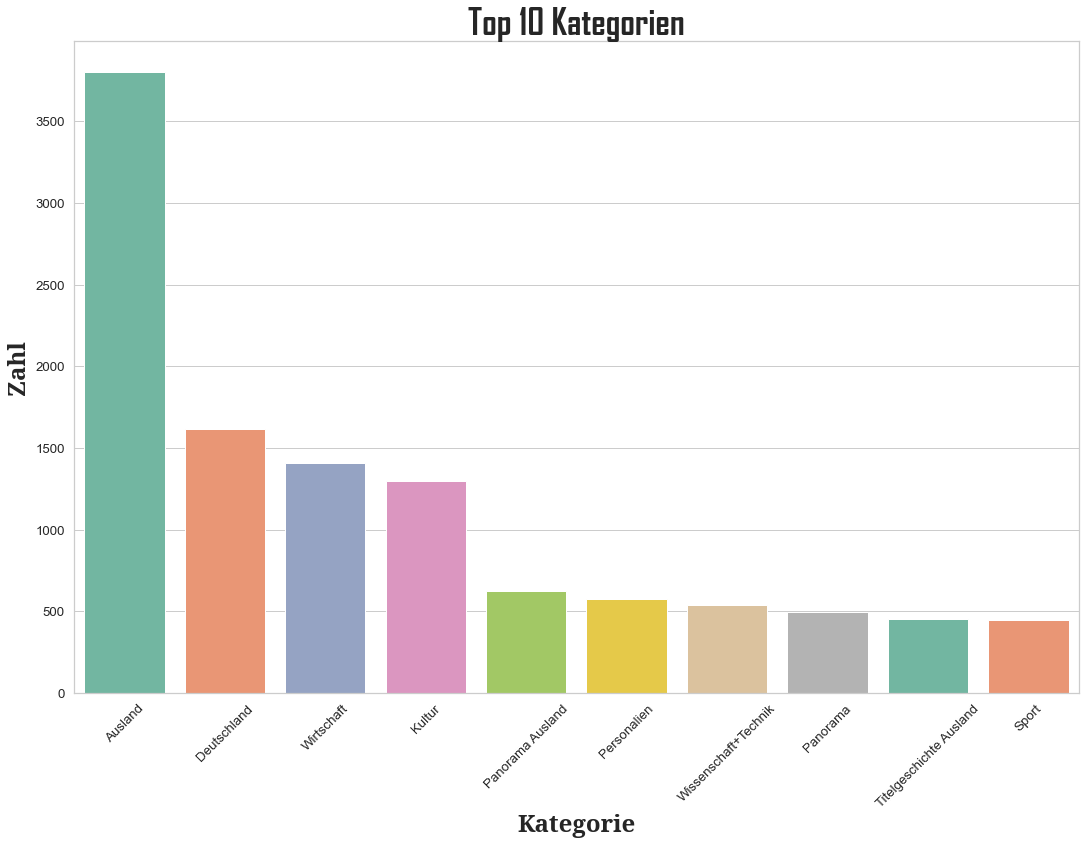

In [9]:
plt.figure(figsize = (18,12))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "Channel" , data = f, order = list(f['Channel'].value_counts().index[0:10]), palette="Set2")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
chart.set_ylabel("Zahl", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_xlabel("Kategorie", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_title("Top 10 Kategorien", fontsize = 36, fontweight = 'bold',fontfamily = 'Agency FB')

## 用spacy对标题和摘要进行处理

In [20]:
f['title_words'] = ''
f['abstract_words'] = ''

In [21]:
f.head()

Channel   Epaperkey Erscheinungsdatum      Score Seite  \
0  Titelgeschichte Ausland  SP-1950-52        25.12.1950   4.334617    15   
1               Wirtschaft  SP-1950-30        27.07.1950   4.285549    25   
2              Deutschland  SP-1950-30        27.07.1950  1.8850946     7   
3                  Ausland  SP-1950-30        27.07.1950  3.8426323    15   
4          Titelgeschichte  SP-1950-30        27.07.1950  1.1495895    30   

                                                Text  \
0  Abend für Abend wird der General Douglas MacAr...   
1  Die Reisenden des D-Zuges Wien-München setzten...   
2  Fünf Tage lang verstärkten in der noch farbfeu...   
3  Amerikanische Soldaten paradierten auf der bre...   
4  (s. Titel)\nIn Düsseldorfs Städtischen Kranken...   

               Ueberschrift  \
0      Die Schauspiel-Kunst   
1    Nur wer mit Asien geht   
2  Die anderen im Zuchthaus   
3   Mit Blut unterschrieben   
4          Es gibt zu viele   

                                            Vorspann       _id  \
0  (s. Titel); Abend für Abend wird der General D...  44451412   
1  Die Reisenden des D-Zuges Wien-München setzten...  44449639   
2  Fünf Tage lang verstärkten in der noch farbfeu...  44449630   
3  Amerikanische Soldaten paradierten auf der bre...  44449636   
4  (s. Titel) In Düsseldorfs Städtischen Krankena...  44449643   

                                          text_words title_words  \
0  (Abend, für, Abend, wird, der, General, Dougla...               
1  (Die, Reisenden, des, D-Zuges, Wien-München, s...               
2  (Fünf, Tage, lang, verstärkten, in, der, noch,...               
3  (Amerikanische, Soldaten, paradierten, auf, de...               
4  ((, s., Titel, ), \n, In, Düsseldorfs, Städtis...               

  abstract_words  
0                 
1                 
2                 
3                 
4

In [22]:
for i in tqdm(range(len(f['Vorspann']))):
    try:
        f['title_words'].loc[i] = nlp(f['Ueberschrift'].loc[i])
    except:
        f['title_words'].loc[i] = nlp('Kein Überschrift')
    try:
        f['abstract_words'].loc[i] = nlp(f['Vorspann'].loc[i])
    except:
        f['abstract_words'].loc[i] = nlp('Kein Vorspann')

100%|████████████████████████████████████████████████████████████████████████████| 18266/18266 [05:48<00:00, 52.42it/s]


## 绘制标题、摘要和文本的词云

In [14]:
title_nouns = list()
abstract_nouns = list()
text_nouns = list()

In [ ]:
for i in tqdm(f['title_words']):
    for chunk in i:
        if (chunk.pos_ == 'PROPN' or chunk.pos_ == 'NOUN') and chunk.is_stop is False and ('SPIEGEL' not in chunk.text) and ('Spiegel' not in chunk.text) and ('Betr' not in chunk.text) and ('FERNSEHEN' not in chunk.text) and ('WOCHE' not in chunk.text):
            title_nouns.append(chunk.text)
print(title_nouns)

In [51]:
abstract_nouns = list()
for i in tqdm(f['abstract_words']):
    for chunk in i:
        if (chunk.pos_ == 'PROPN' or chunk.pos_ == 'NOUN') and chunk.is_stop is False and ('SPIEGEL' not in chunk.text) and ('Spiegel' not in chunk.text) and ('Betr' not in chunk.text) and ('U' not in chunk.text) and ('DER' not in chunk.text) and ('links' not in chunk.text) and ('*' not in chunk.text) and ('>' not in chunk.text):
            abstract_nouns.append(str(chunk.lemma_))

100%|█████████████████████████████████████████████████████████████████████████| 18266/18266 [00:00<00:00, 19504.62it/s]


In [15]:
text_nouns = list()
for i in tqdm(f['text_words']):
    for chunk in i:
        if (chunk.pos_ == 'PROPN' or chunk.pos_ == 'NOUN') and chunk.is_stop is False and ('SPIEGEL' not in chunk.text) and ('Spiegel' not in chunk.text) and ('Gutschein' not in chunk.text) and ('>' not in chunk.text) and len(chunk.text) < 20:
            text_nouns.append(str(chunk.lemma_))

100%|███████████████████████████████████████████████████████████████████████████| 18266/18266 [01:06<00:00, 275.25it/s]


(-0.5, 2999.5, 1999.5, -0.5)

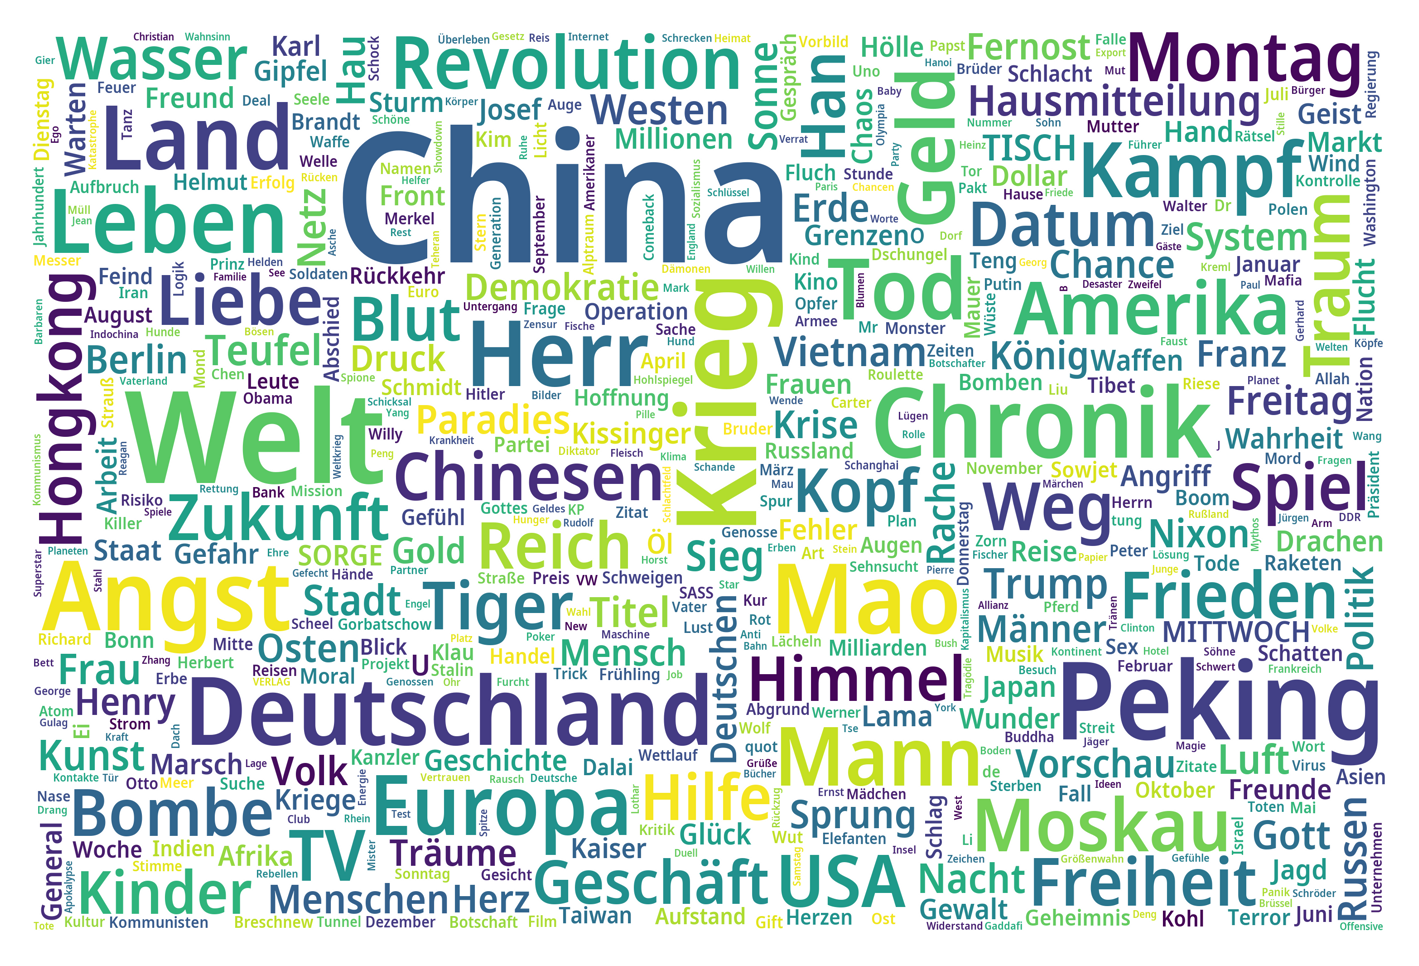

In [43]:
all_words = ' '.join(title_nouns)
wc = WordCloud(font_path='C:/Windows/Fonts/NotoSans-SemiCondensedSemiBold.ttf',
               background_color="white",  # 背景颜色
               max_words=10000,  # 词云显示的最大词数
               max_font_size=400,  # 字体最大值
               min_font_size=20, #字体最小值
               random_state=78, #随机数
               collocations=False, #避免重复单词
               width=3000,height=2000,margin=10, #图像宽高，字间距，需要配合下面的plt.figure(dpi=xx)放缩才有效
              )

wc.generate(all_words)
plt.figure(dpi=300) #通过这里可以放大或缩小
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis("off") #隐藏坐标

(-0.5, 2999.5, 1999.5, -0.5)

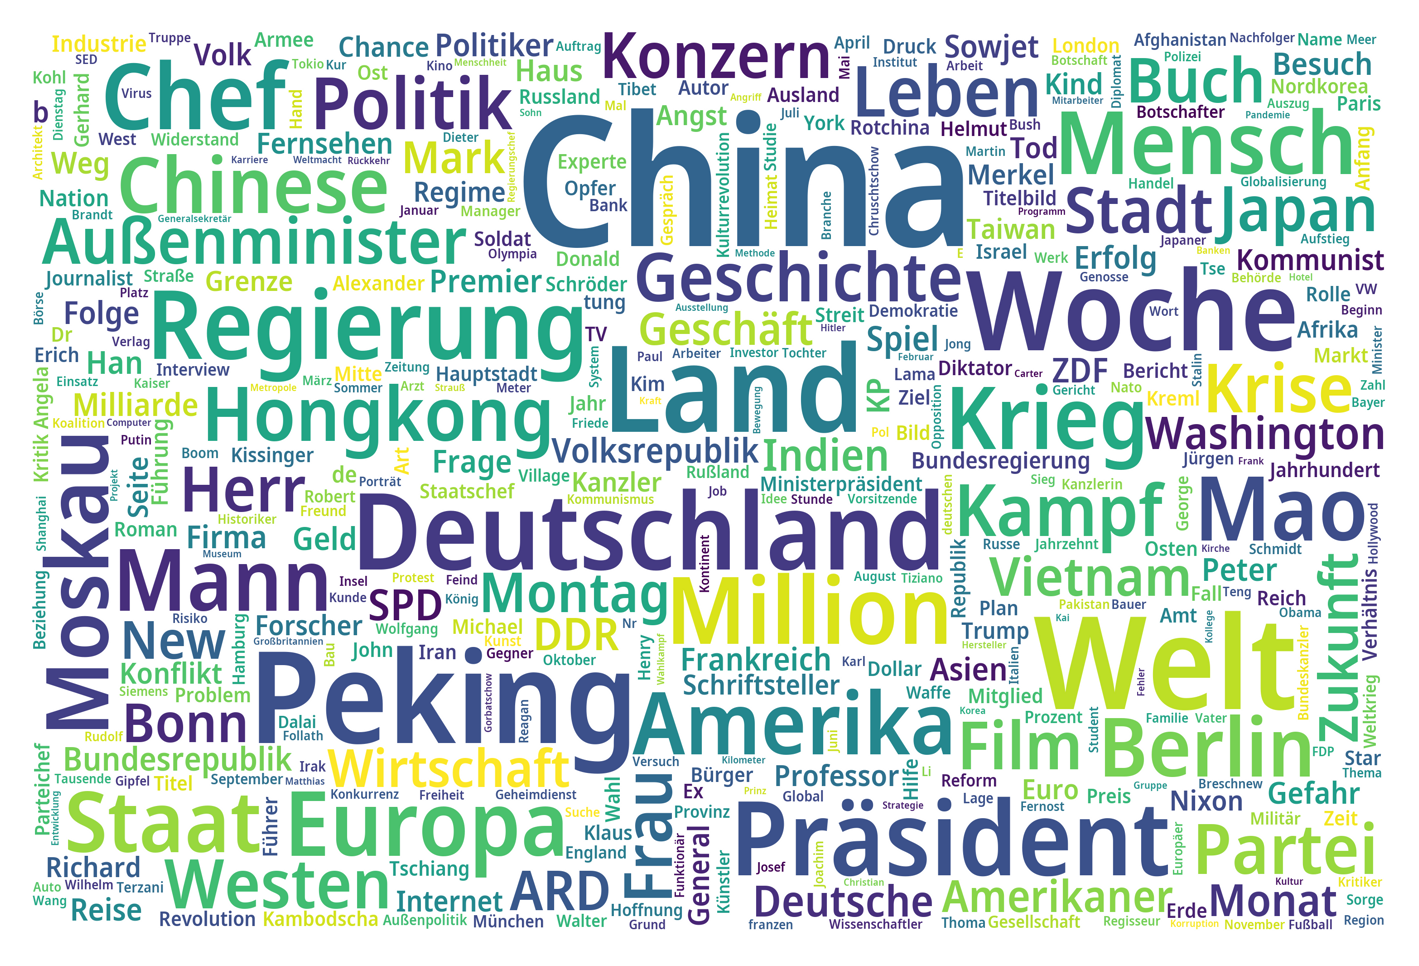

In [45]:
all_words = ' '.join(abstract_nouns)
wc.generate(all_words)
plt.figure(dpi=300) #通过这里可以放大或缩小
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis("off") #隐藏坐标

(-0.5, 2999.5, 1999.5, -0.5)

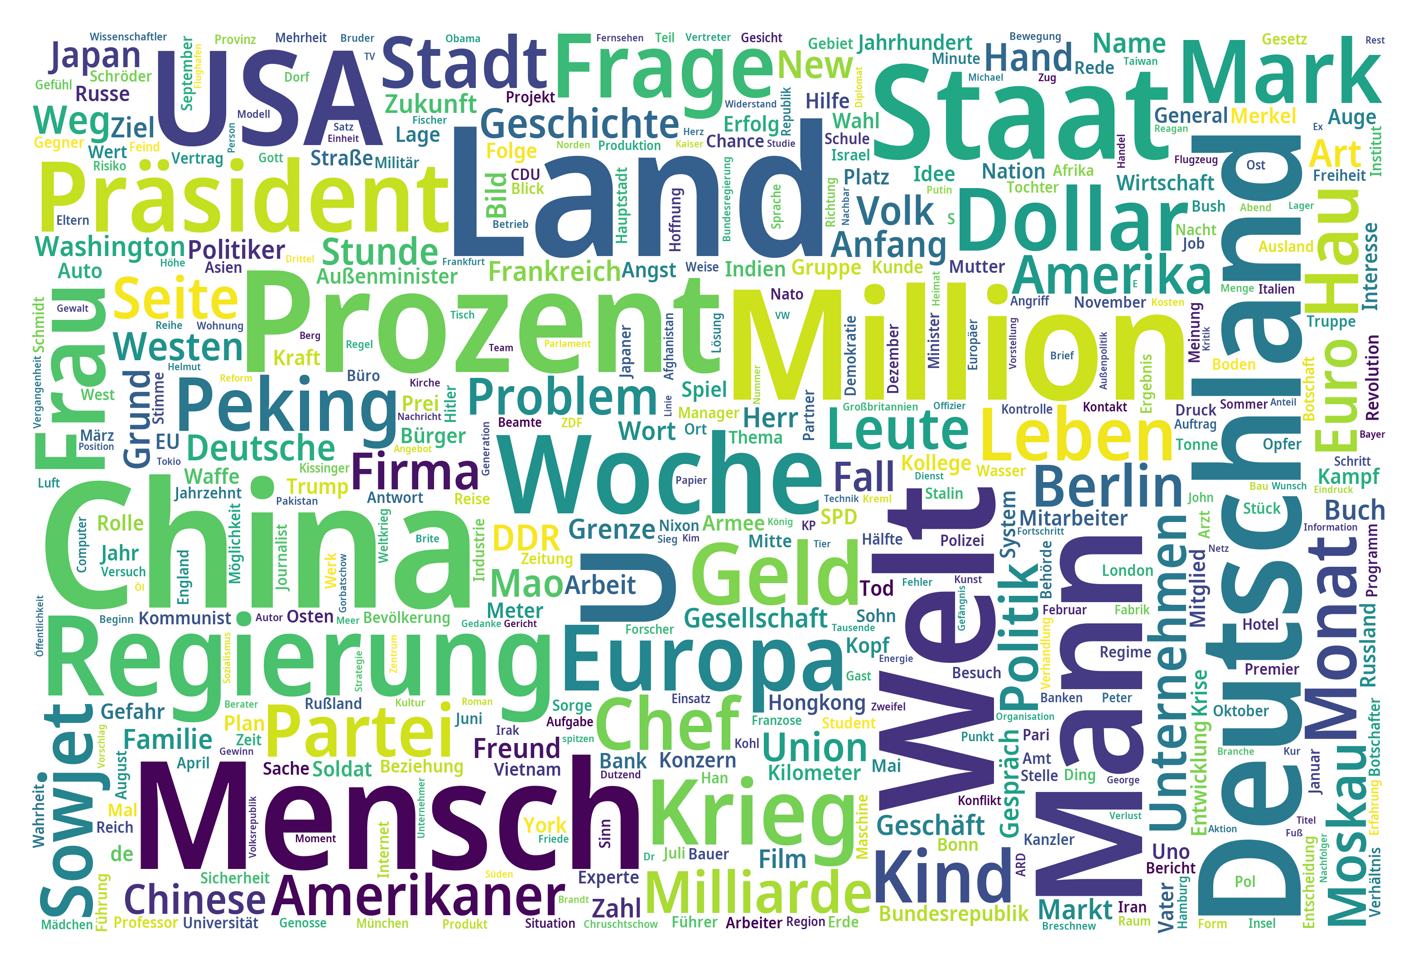

In [17]:
wc = WordCloud(font_path='C:/Windows/Fonts/NotoSans-SemiCondensedSemiBold.ttf',
               background_color="white",  # 背景颜色
               max_words=1000,  # 词云显示的最大词数
               max_font_size=400,  # 字体最大值
               min_font_size=20, #字体最小值
               random_state=78, #随机数
               collocations=False, #避免重复单词
               width=3000,height=2000,margin=10, #图像宽高，字间距，需要配合下面的plt.figure(dpi=xx)放缩才有效
              )
all_words = ' '.join(text_nouns)
wc.generate(all_words)
plt.figure(dpi=300) #通过这里可以放大或缩小
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis("off") #隐藏坐标

In [193]:
text_nouns

['Handel',
 'Luxus',
 'SPIEGEL',
 '52Prada-Werbung',
 'Macau',
 'Kontakt',
 'wasKonsum',
 'Krise',
 'Krise',
 'Luxussegment',
 'Geschäft',
 'China',
 'Deutsche',
 'Bahnhofstrae',
 'Ort',
 'fr',
 'Geldbeutel',
 'Europa',
 'Luxusboutiquen',
 'Rolex',
 'Prada',
 'Burberry',
 'Herms',
 'Marke',
 'fr',
 'Normalverdiener',
 'Zara',
 'M',
 'Benetton',
 'Filiale',
 'Dezembermorgen',
 'Passant',
 'Andrang',
 'Louis',
 'Vuitton',
 'Dutzend',
 'Kunde',
 'Schlange',
 'Temperatur',
 'Gefrierpunkt',
 'Schweiz',
 'Vorschau',
 'Ausgabe',
 'Abo',
 'SPIEGEL-ID',
 'Artikel',
 'AnmeldenMIT',
 'SPIEGEL+',
 'LESEN',
 'GRATIS',
 'TESTEN',
 'Artikel',
 'Ausgabe',
 '2020.',
 'Ausgabe',
 'kaufenDER',
 'SPIEGEL52',
 'Yeung',
 'Bloomberg',
 'Getty',
 'ImagesDaniel',
 'Pilar',
 'SPIEGEL',
 '51HausmitteilungTitelChinaSommermärchenHumboldt',
 'Forum',
 'Feldenkirchen',
 'GroekathferEs',
 'Fehleinschtzung',
 'Jahr',
 'Shutdown',
 'Corona-Welle',
 'November',
 'Versprechen',
 'Shutdown',
 'SPIEGEL-Team',
 'Markus',
 '

## 标题、摘要和文本中的高频词排行统计可视化

In [47]:
title_nouns_df = pd.DataFrame()
title_nouns_df['words'] = title_nouns

Text(0.5, 1.0, 'Top 10 Substantive im Titel')

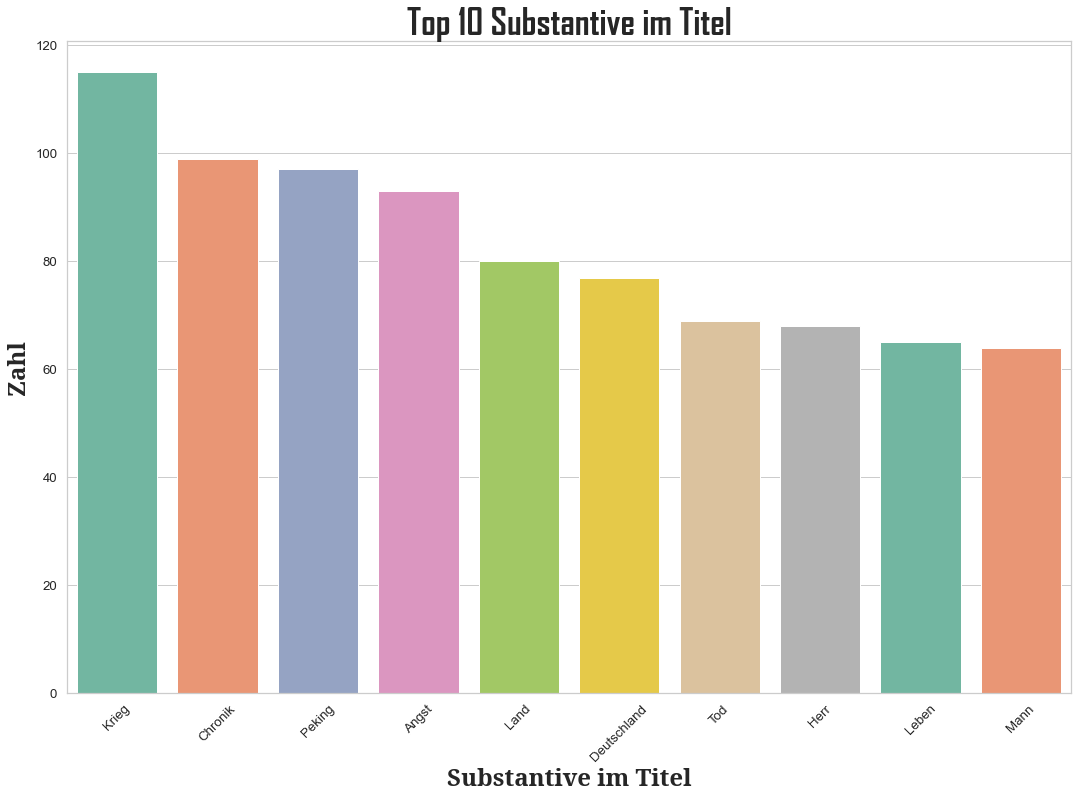

In [48]:
plt.figure(figsize = (18,12))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "words" , data = title_nouns_df, order = list(title_nouns_df['words'].value_counts().index[2:12]), palette="Set2")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
chart.set_ylabel("Zahl", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_xlabel("Substantive im Titel", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_title("Top 10 Substantive im Titel", fontsize = 36, fontweight = 'bold',fontfamily = 'Agency FB')

Text(0.5, 1.0, 'Top 10 Substantive im Vorspann')

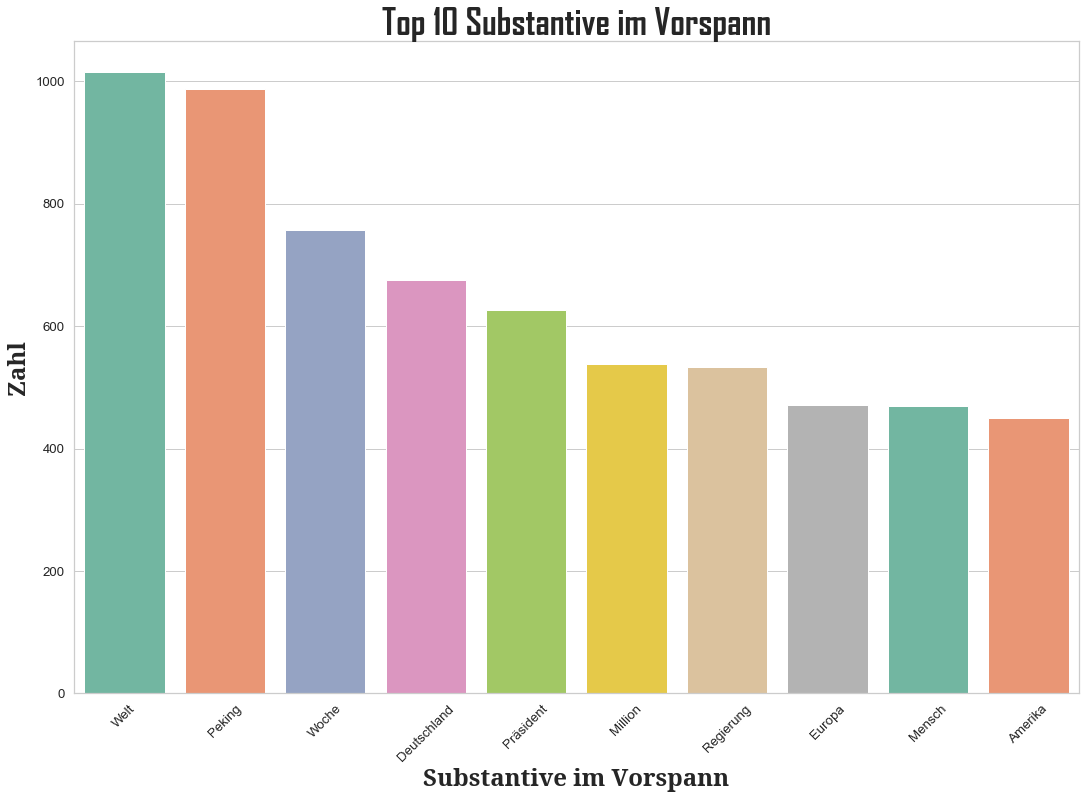

In [52]:
abstract_nouns_df = pd.DataFrame()
abstract_nouns_df['words'] = abstract_nouns

plt.figure(figsize = (18,12))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "words" , data = abstract_nouns_df, order = list(abstract_nouns_df['words'].value_counts().index[1:3]) + list(abstract_nouns_df['words'].value_counts().index[4:12]), palette="Set2")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
chart.set_ylabel("Zahl", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_xlabel("Substantive im Vorspann", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_title("Top 10 Substantive im Vorspann", fontsize = 36, fontweight = 'bold',fontfamily = 'Agency FB')

Text(0.5, 1.0, 'Top 10 Substantive im Text')

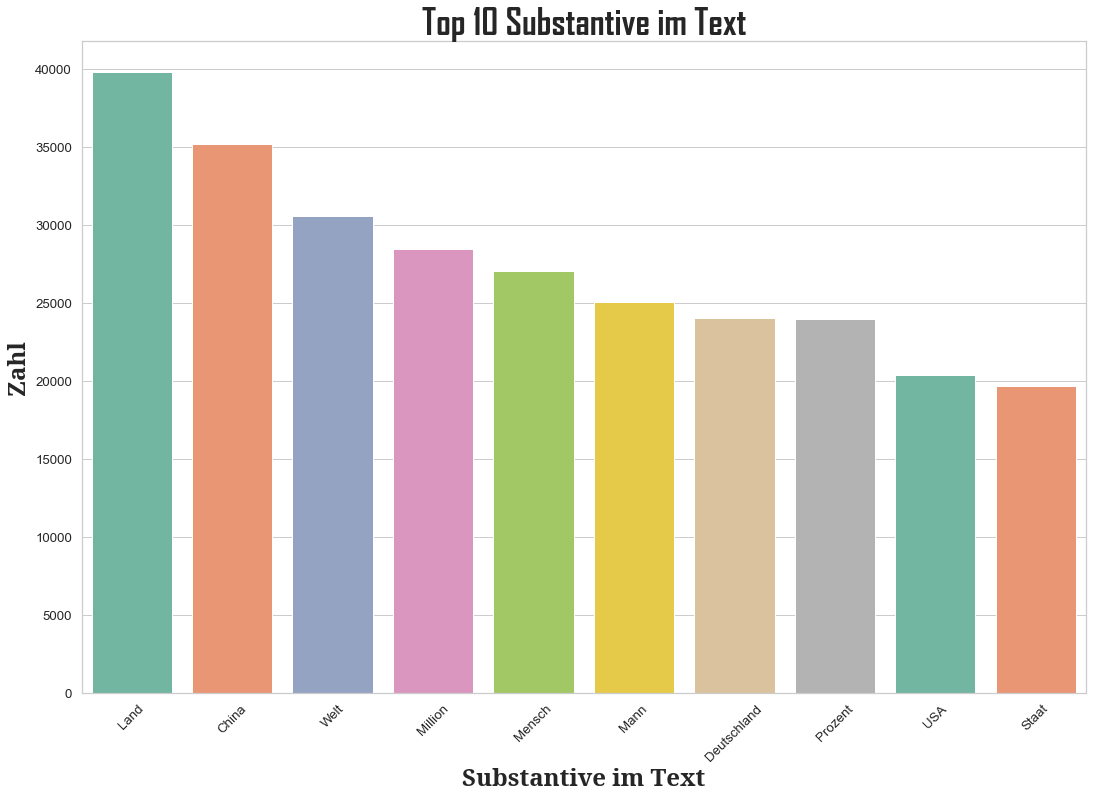

In [19]:
text_nouns_df = pd.DataFrame()
text_nouns_df['words'] = text_nouns

plt.figure(figsize = (18,12))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "words" , data = text_nouns_df, order = list(text_nouns_df['words'].value_counts().index[0:10]), palette="Set2")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
chart.set_ylabel("Zahl", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_xlabel("Substantive im Text", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_title("Top 10 Substantive im Text", fontsize = 36, fontweight = 'bold',fontfamily = 'Agency FB')

## 对报道数量的在各个年份和年代的分布进行可视化

In [5]:
my_dict = {'1947 - 1960':0, '1961 - 1970': 0, '1971 - 1980': 0, '1981 - 1990': 0, '1991 - 2000': 0, '2001 - 2010': 0, '2011 - 2020': 0}

In [6]:
for i in f['Erscheinungsdatum']:
    year = int(i[-4:])
    if year <= 1960:
        my_dict['1947 - 1960'] += 1
    elif year <= 1970:
        my_dict['1961 - 1970'] += 1
    elif year <= 1980:
        my_dict['1971 - 1980'] += 1
    elif year <= 1990:
        my_dict['1981 - 1990'] += 1
    elif year <= 2000:
        my_dict['1991 - 2000'] += 1
    elif year <= 2010:
        my_dict['2001 - 2010'] += 1
    elif year <= 2020:
        my_dict['2011 - 2020'] += 1

In [7]:
my_dict

{'1947 - 1960': 1167,
 '1961 - 1970': 1594,
 '1971 - 1980': 2402,
 '1981 - 1990': 2425,
 '1991 - 2000': 2832,
 '2001 - 2010': 4075,
 '2011 - 2020': 3771}

In [8]:
cnt_df = pd.DataFrame()
cnt_df['decade'] = ''
cnt_df['count'] = 0
i = 0
for m in my_dict.keys():
    cnt_df.loc[i] = [str(m), int(my_dict[str(m)])]
    i+=1
cnt_df

decade  count
0  1947 - 1960   1167
1  1961 - 1970   1594
2  1971 - 1980   2402
3  1981 - 1990   2425
4  1991 - 2000   2832
5  2001 - 2010   4075
6  2011 - 2020   3771

In [9]:
cnt_df.to_excel('decade_cnt.xlsx')

Text(0.5, 1.0, 'Zahl der Artikel pro Dekade')

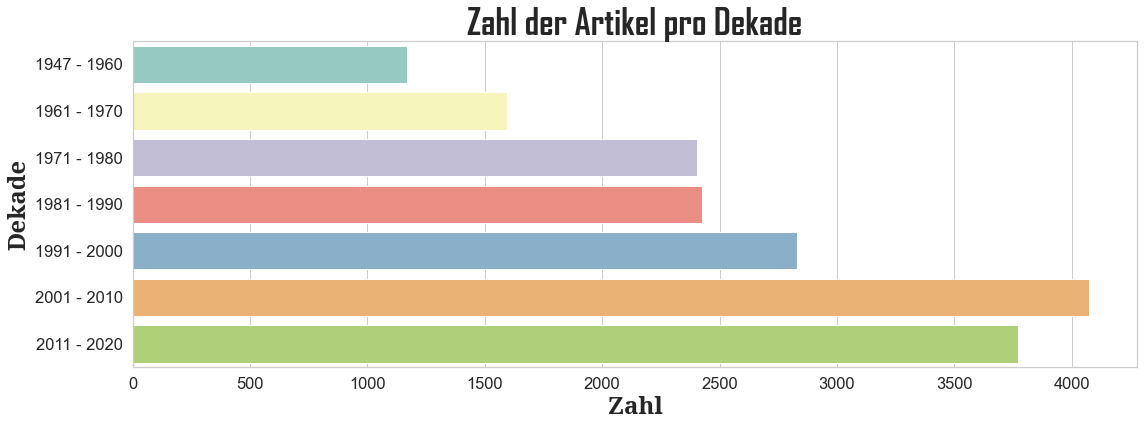

In [18]:
#print(cnt_df['decade'])
plt.figure(figsize = (18,6))
sns.set(style = "whitegrid",font_scale = 1.5)
chart = sns.barplot(y = 'decade', x = 'count', data = cnt_df, orient='h', palette='Set3')
#chart.set_xticklabels(chart.get_xticklabels())
chart.set_ylabel("Dekade", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_xlabel("Zahl", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_title("Zahl der Artikel pro Dekade", fontsize = 36, fontweight = 'bold',fontfamily = 'Agency FB')

In [6]:
cnt_dict = dict()

In [7]:
for i in f['Erscheinungsdatum']:
    year = str(i[-4:])
    if year in cnt_dict:
        cnt_dict[year] += 1
    else:
        cnt_dict[year] = 1
cnt_dict

{'1950': 126,
 '1948': 91,
 '1960': 88,
 '1947': 91,
 '1954': 63,
 '1953': 56,
 '1951': 143,
 '1969': 201,
 '1967': 215,
 '1964': 191,
 '1963': 112,
 '1980': 303,
 '1979': 291,
 '1975': 226,
 '1978': 247,
 '1976': 207,
 '1977': 190,
 '1973': 197,
 '1974': 194,
 '1971': 266,
 '1988': 260,
 '1989': 314,
 '1986': 237,
 '1985': 249,
 '1984': 227,
 '1983': 174,
 '1981': 259,
 '2000': 330,
 '1999': 341,
 '1998': 298,
 '1997': 320,
 '1996': 288,
 '1995': 260,
 '1994': 258,
 '1993': 286,
 '1991': 219,
 '2010': 382,
 '2009': 404,
 '2008': 558,
 '2007': 525,
 '2006': 427,
 '2005': 450,
 '2004': 411,
 '2003': 345,
 '2001': 280,
 '2020': 496,
 '2019': 392,
 '2018': 326,
 '2017': 345,
 '2016': 323,
 '2015': 321,
 '2013': 377,
 '2014': 348,
 '2012': 413,
 '2011': 430,
 '1968': 154,
 '1970': 210,
 '1966': 169,
 '1961': 87,
 '1972': 281,
 '1990': 230,
 '1987': 260,
 '1982': 215,
 '1992': 232,
 '1956': 69,
 '2002': 293,
 '1959': 87,
 '1957': 67,
 '1962': 76,
 '1965': 179,
 '1952': 85,
 '1955': 33,
 '19

In [11]:
year_df = pd.DataFrame()
year_df['year'] = ''
year_df['count'] = 0
j = 0
for i in range(1947, 2021):
    if str(i) in cnt_dict:
        year_df.loc[j] = [str(i), int(cnt_dict[str(i)])]
    else:
        year_df.loc[j] = [str(i), 0]
    j+=1
year_df

year  count
0   1947     91
1   1948     91
2   1949     93
3   1950    126
4   1951    143
5   1952     85
6   1953     56
7   1954     63
8   1955     33
9   1956     69
10  1957     67
11  1958     75
12  1959     87
13  1960     88
14  1961     87
15  1962     76
16  1963    112
17  1964    191
18  1965    179
19  1966    169
20  1967    215
21  1968    154
22  1969    201
23  1970    210
24  1971    266
25  1972    281
26  1973    197
27  1974    194
28  1975    226
29  1976    207
..   ...    ...
44  1991    219
45  1992    232
46  1993    286
47  1994    258
48  1995    260
49  1996    288
50  1997    320
51  1998    298
52  1999    341
53  2000    330
54  2001    280
55  2002    293
56  2003    345
57  2004    411
58  2005    450
59  2006    427
60  2007    525
61  2008    558
62  2009    404
63  2010    382
64  2011    430
65  2012    413
66  2013    377
67  2014    348
68  2015    321
69  2016    323
70  2017    345
71  2018    326
72  2019    392
73  2020    496

[74 rows x 2 columns]

In [12]:
year_df['<500'] = 0
year_df['500 - 1000'] = 0
year_df['1000 - 2000'] = 0
year_df['>2000'] = 0
for i in tqdm(range(len(f))):
    index = int(f['Erscheinungsdatum'].loc[i][-4:])-1947
    length = len(f['Text'].loc[i].split(' '))
    if length <= 500:
        year_df['<500'].loc[index] += 1
    elif length <= 1000:
        year_df['500 - 1000'].loc[index] += 1
    elif length <= 2000:
        year_df['1000 - 2000'].loc[index] += 1
    else:
        year_df['>2000'].loc[index] += 1

  0%|                                                                                        | 0/18266 [00:00<?, ?it/s]D:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
100%|████████████████████████████████████████████████████████████████████████████| 18266/18266 [26:10<00:00, 11.63it/s]


In [13]:
year_df.to_excel('year_cnt.xlsx')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


Text(0.5, 1.0, 'Zahl der Artikel pro Jahr')

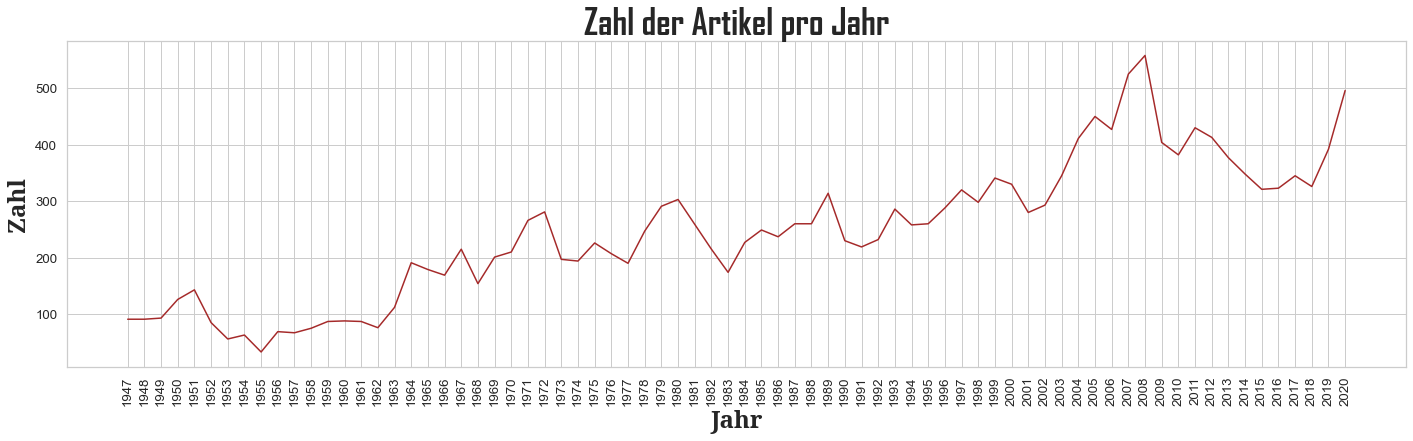

In [17]:
plt.figure(figsize = (24,6))
sns.set(style = "whitegrid",font_scale = 1.2)
#sns.set_context("talk", rc={'line.linewidth':10.5})
chart = sns.lineplot(x = 'year', y = 'count', data = year_df, color = 'brown')
chart.set_xticklabels(year_df['year'],rotation=90)
chart.set_ylabel("Zahl", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_xlabel("Jahr", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_title("Zahl der Artikel pro Jahr", fontsize = 36, fontweight = 'bold',fontfamily = 'Agency FB')